In [18]:
import numpy as np
import matplotlib.pyplot as plt

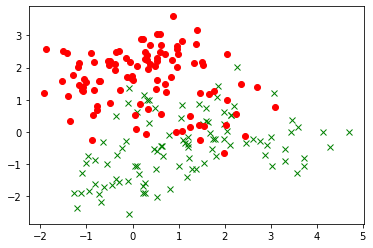

In [21]:
x0, y0, x1, y1 = np.loadtxt('classasgntrain1.dat').T

plt.plot(x0, y0, 'gx')
plt.plot(x1, y1, 'ro')
plt.show()